In [4]:
print ("Cuántos sobres se necesitan para llenar el album usando Python")

Cuántos sobres se necesitan para llenar el album usando Python


In [5]:
import random

#la funcion randint(a, b) devuelve un numero entero pseudo-aleatorio N talque 
#a <= N <= b. 
dado = random.randint(1, 6)

print (dado)

1


In [7]:
#para modela(r el sobre utilizaremos la funcion sample. 
sobre = random.sample(range(669), 5)

print (sobre)

[101, 201, 499, 345, 47]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#las constantes de la simulacion
FIGURITAS_POR_PAQUETE = 5
FIGURITAS_POR_ALBUM = 669
CANTIDAD_DE_CORRIDAS = 1000

In [10]:
#inicializo el vector simulacion
#alli voy a ir registrando cuantos sobres necesito en cada corrida
simulacion = np.empty(CANTIDAD_DE_CORRIDAS)

In [42]:
#voy a realizar tantas corridas como dice la constante CANTIDAD_DE_CORRIDAS
for i in range(CANTIDAD_DE_CORRIDAS):

	#modelo el album vacio como un vector lleno de ceros
	album = np.zeros(FIGURITAS_POR_ALBUM, dtype=int)

	#en esta variable contabilizare cuantos sobres se necesitan 
	cantidad_de_sobres = 0

	#voy abriendo sobres nuevos hasta llenar el album
	#si el vector contiene algun 0 en alguna posicion significa 
	#que aun no esta completo esa condicion la podemos expresar de muchas 
	#formas la que elegi es min(album) == 0, 
	#tambien podria ser len(album[album == 0]) > 0 
	while min(album) == 0:

		#un nuevo sobre formado por figuritas tomadas de manera aleatoria
		sobre = random.sample(range(FIGURITAS_POR_ALBUM), FIGURITAS_POR_PAQUETE)

		#voy llenando el album
		#sumo 1 en cada posicion correspondiente a cada una de las figuritas 
    #del sobre
    #
    #Nota: para quienes conocen otros lenguajes de programacion, esta 
    #operacion puede llegar a causar confusion. La libreria NumPy permite
    #realizar operaciones sobre multiples indices a la vez. 
    #Aprovechenla, es muy util.
		album[sobre] += 1

		#incremento la cantidad de sobres en 1
		cantidad_de_sobres += 1

	#para llenar este album he necesitado tantos sobres como 
  #lo dice cantidad_de_sobres
	simulacion[i] = cantidad_de_sobres


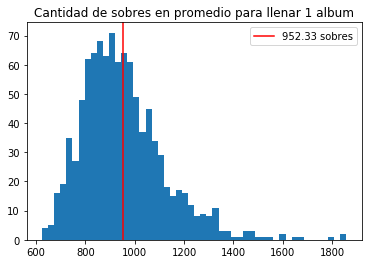

In [32]:
#cuantos sobres necesitamos en promedio para llenar el album
sobres_promedio = simulacion.mean()

#visualizamos la simulacion con un histograma de las corridas
plt.hist(simulacion, bins=50)
plt.axvline(sobres_promedio, color='r')
plt.legend(["%.2f sobres" % sobres_promedio])
plt.title("Cantidad de sobres en promedio para llenar 1 album")
plt.show()

In [44]:
print ("Llenar el album costará... %2.f pesos. Y qué hago con las %d repetidas!" % (sobres_promedio * 15, sobres_promedio * FIGURITAS_POR_PAQUETE - FIGURITAS_POR_ALBUM))

Llenar el album costará... 14285 pesos. Y qué hago con las 4092 repetidas!


In [45]:
#pensemos un grupo de 20 amigos que se juntan para llenar cada uno su album
CANTIDAD_DE_ALBUMES = 20

In [46]:
#inicializo el vector simulacion_grupo con 2 dimensiones 
simulacion_grupo = np.zeros([CANTIDAD_DE_ALBUMES+1,
                             CANTIDAD_DE_CORRIDAS], dtype=int)


In [49]:
#voy a realizar muchas corridas, tantas como dice la constante CANTIDAD_DE_CORRIDAS
for i in range(CANTIDAD_DE_CORRIDAS):

  #modelo el album vacio como un vector lleno de ceros
  album = np.zeros(FIGURITAS_POR_ALBUM, dtype=int)

  #en esta variable contabilizare cuantos sobres se necesitan para llenar 1..n albumes
  cantidad_de_sobres = 0

  #aqui voy a contabilizar cuando albumes estan llenos
  albumes_llenos = 0

  #a diferencia de la simulacion anterior, la condicion de corte sera cuando se 
  #llenen los n albumes. Eso lo podemos expresar asi:
	#albumes_llenos < CANTIDAD_DE_ALBUMES
  while albumes_llenos < CANTIDAD_DE_ALBUMES:

    #un nuevo sobre formado por figuritas tomadas de manera aleatoria
    sobre = random.sample(range(FIGURITAS_POR_ALBUM), FIGURITAS_POR_PAQUETE)

    #voy llenando los albumes
    album[sobre] += 1

    #incremento la cantidad de sobres en 1
    cantidad_de_sobres += 1

    #si el min(album) se incremento, significa que se ha llenado un nuevo album. 
    if albumes_llenos < min(album):
      #hemos llenado un album nuevo
      albumes_llenos = min(album)

      #registramos la cantidad de sobres
      simulacion_grupo[albumes_llenos, i] = cantidad_de_sobres

Text(0.5,0.98,'Cantidad de sobres en promedio para llenar $n$ albumes')

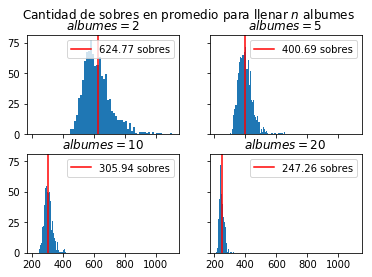

In [50]:
#cuantos sobres necesitamos en promedio para llenar n-albumes
#usamos una matriz de histogramas

amigos = [2, 5, 10, 20]

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)

for ax, q in zip(axes.flat, amigos):
  simulacion = simulacion_grupo[q]/q
  sobres_promedio = simulacion.mean()
  ax.set_title('$albumes=%d $' % (q))
  ax.hist(simulacion, bins=50)
  ax.axvline(sobres_promedio, color='r')
  ax.legend(["%.2f sobres" % sobres_promedio])

fig.suptitle("Cantidad de sobres en promedio para llenar $n$ albumes")